# <center> 6. Линейная регрессия. Практика
---

In [75]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [76]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age — возраст страхователя;

sex — пол;

bmi — индекс массы тела (кг/м^2), в идеале — от 18.5 до 24.9;

children — количество детей, охваченных медицинской страховкой;

smoker — является ли человек курящим;

region — район проживания в США (северо-восток, юго-восток, северо-запад, юго-запад);

charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

In [77]:
print(data.shape)
# (1338, 7)

(1338, 7)


In [78]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

age, bmi, children — числовые признаки;

sex, smoker — бинарные категориальные переменные (две категории);

region — множественные категориальные переменные (несколько категорий);

charges — числовой целевой признак.

In [79]:
num_features = list(data.dtypes[(data.dtypes != 'object')].index)
cat_features = list(data.dtypes[(data.dtypes == 'object')].index)

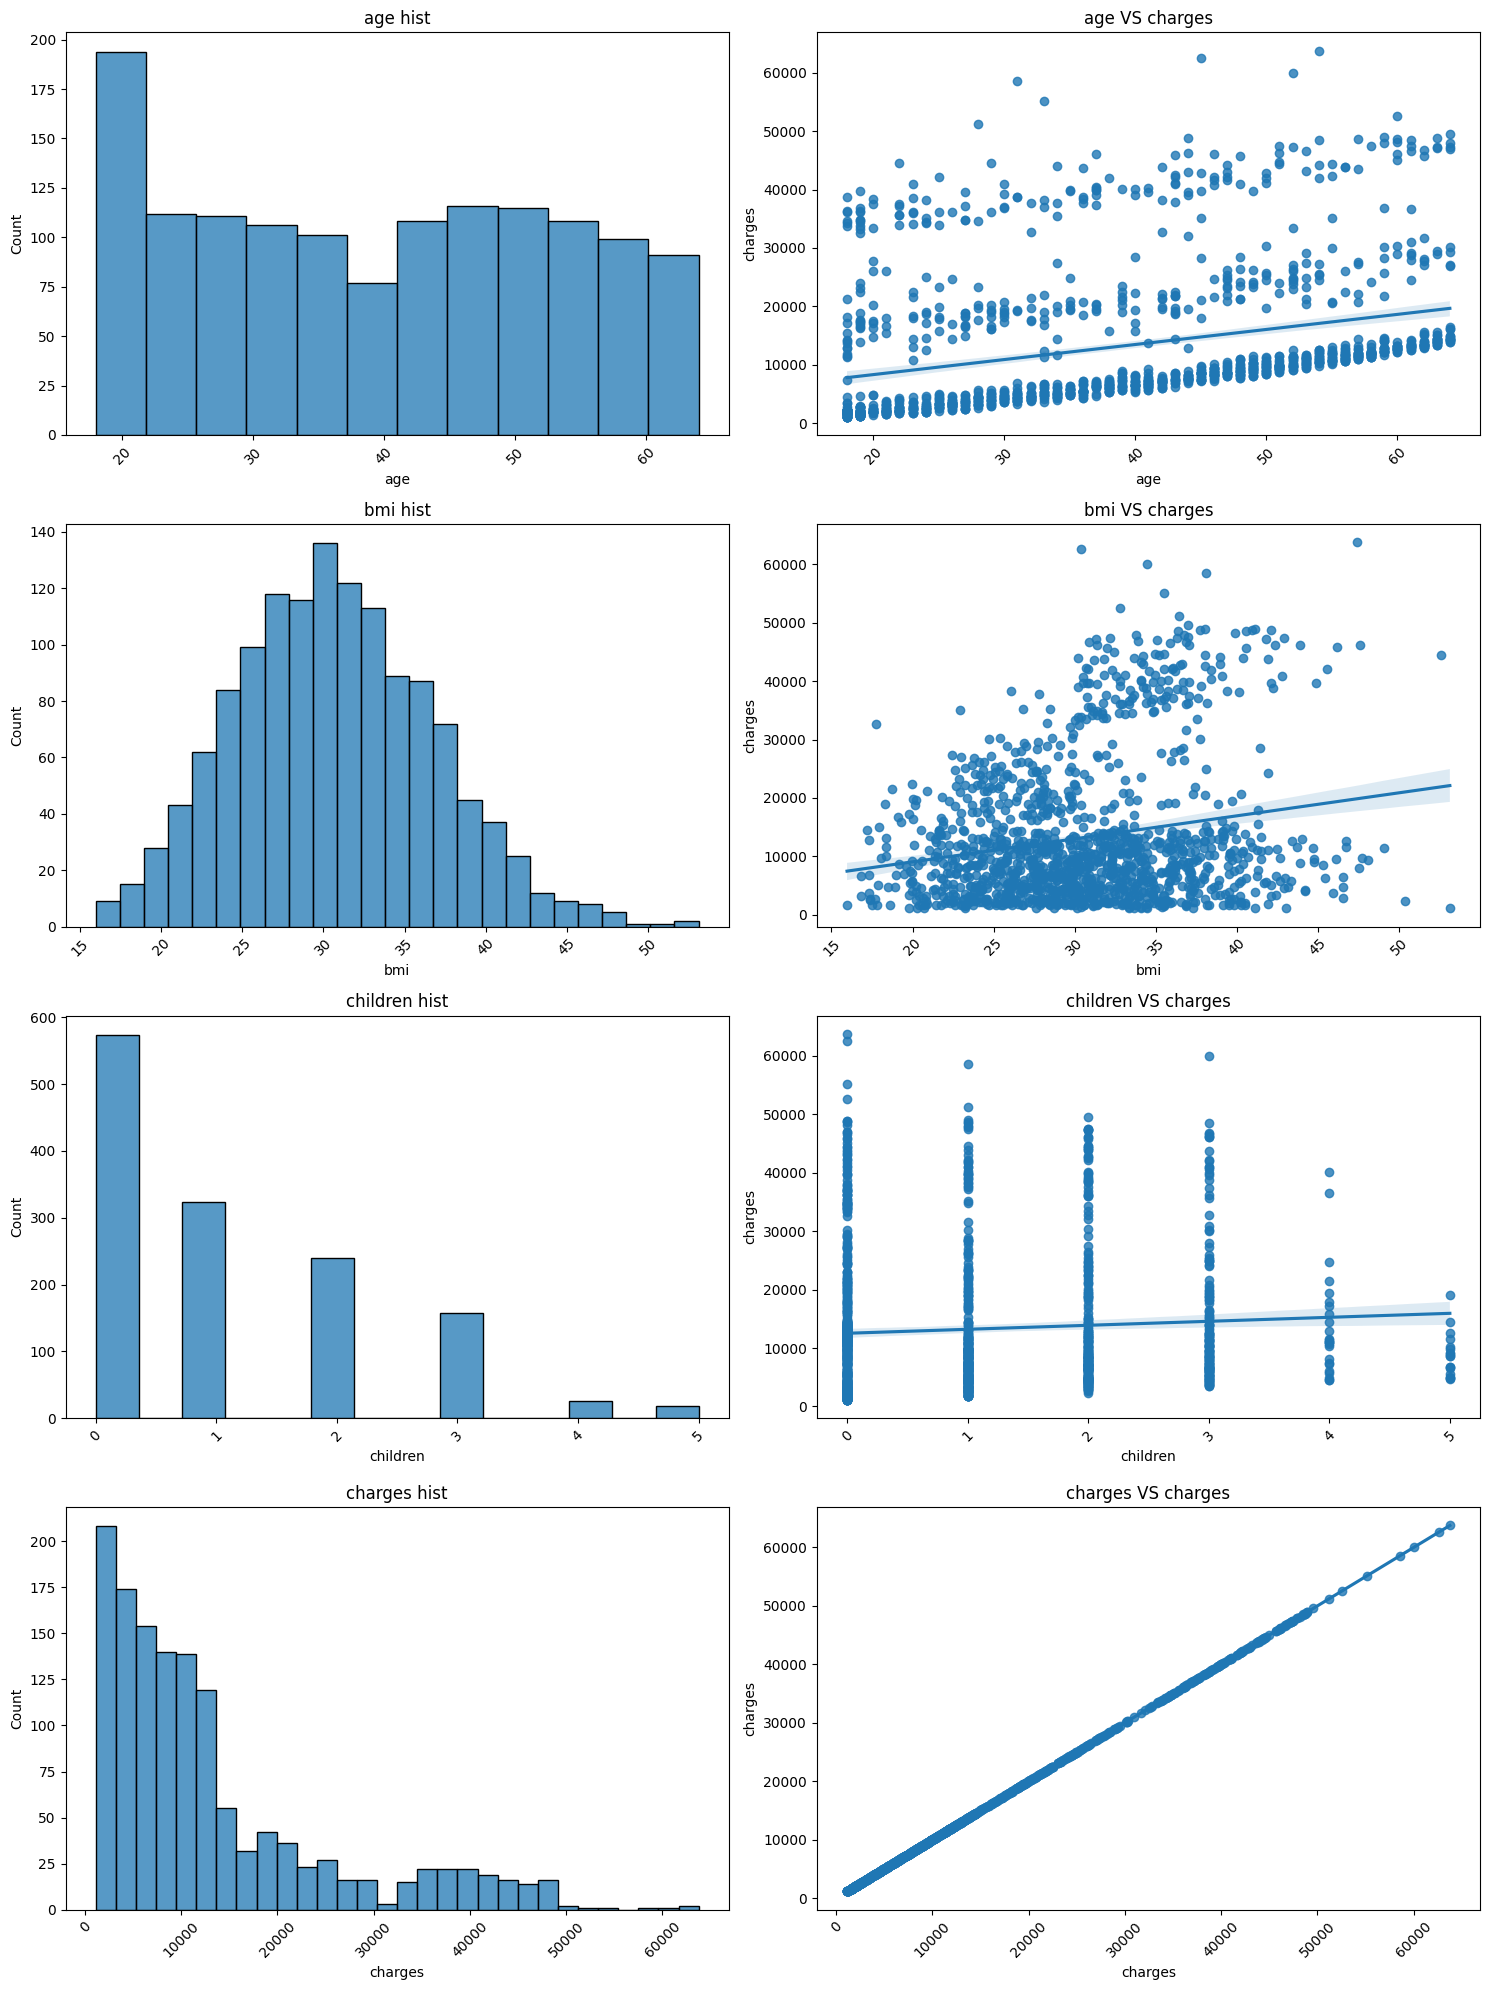

In [80]:
n = len(num_features)
fig, axes = plt.subplots(n, 2, figsize=(15, 20))
for i, feature in enumerate(num_features):
    histplot = sns.histplot(data, x=feature, ax=axes[i][0])
    histplot.set_title('{} hist'.format(feature))
    histplot.xaxis.set_tick_params(rotation=45)
    regplot = sns.regplot(data, x=feature, y='charges', ax=axes[i][1])
    regplot.set_title('{} VS charges'.format(feature));
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout()

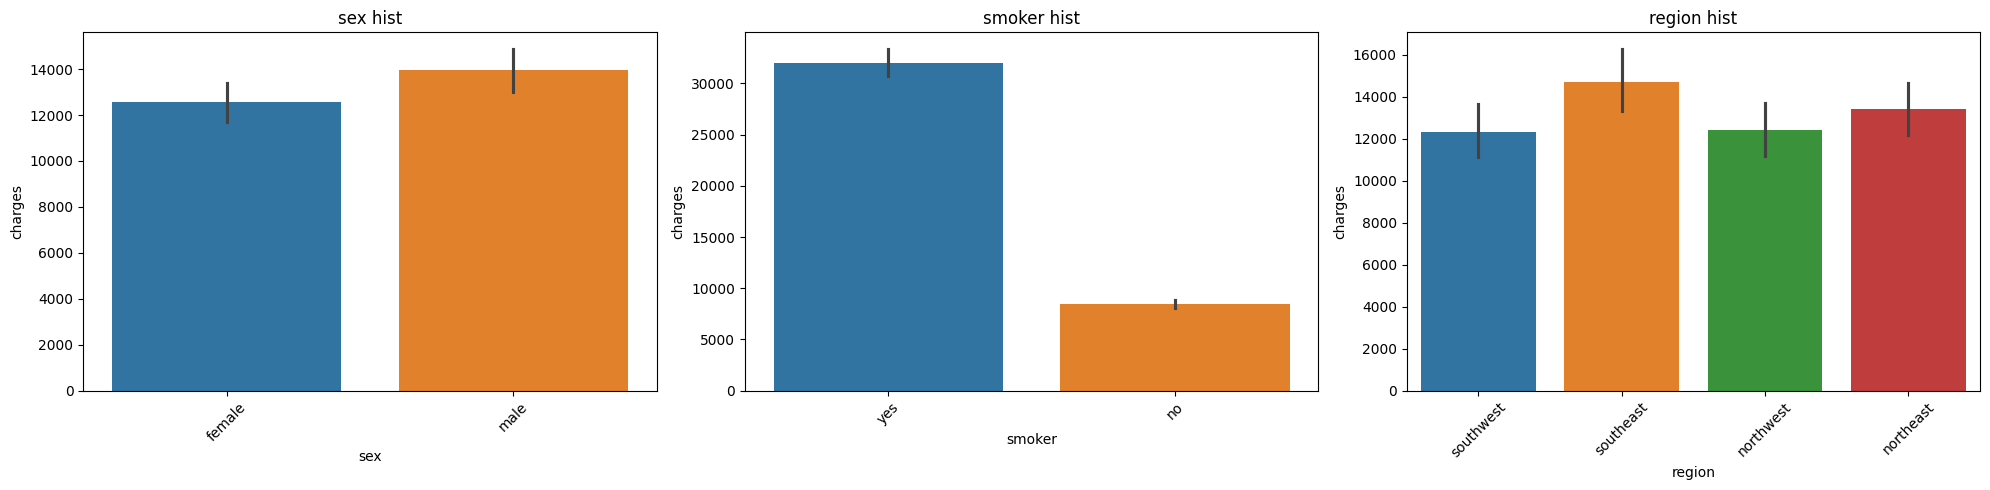

In [81]:
n = len(cat_features)
fig, axes = plt.subplots(1, n, figsize=(20, 5))
for i, feature in enumerate(cat_features):
    barplot = sns.barplot(data, x=feature, y='charges', hue=feature, ax=axes[i])
    barplot.set_title('{} hist'.format(feature))
    barplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout()

In [82]:
non_target_num_features = list(data.dtypes[(data.dtypes != 'object')].drop('charges').index)

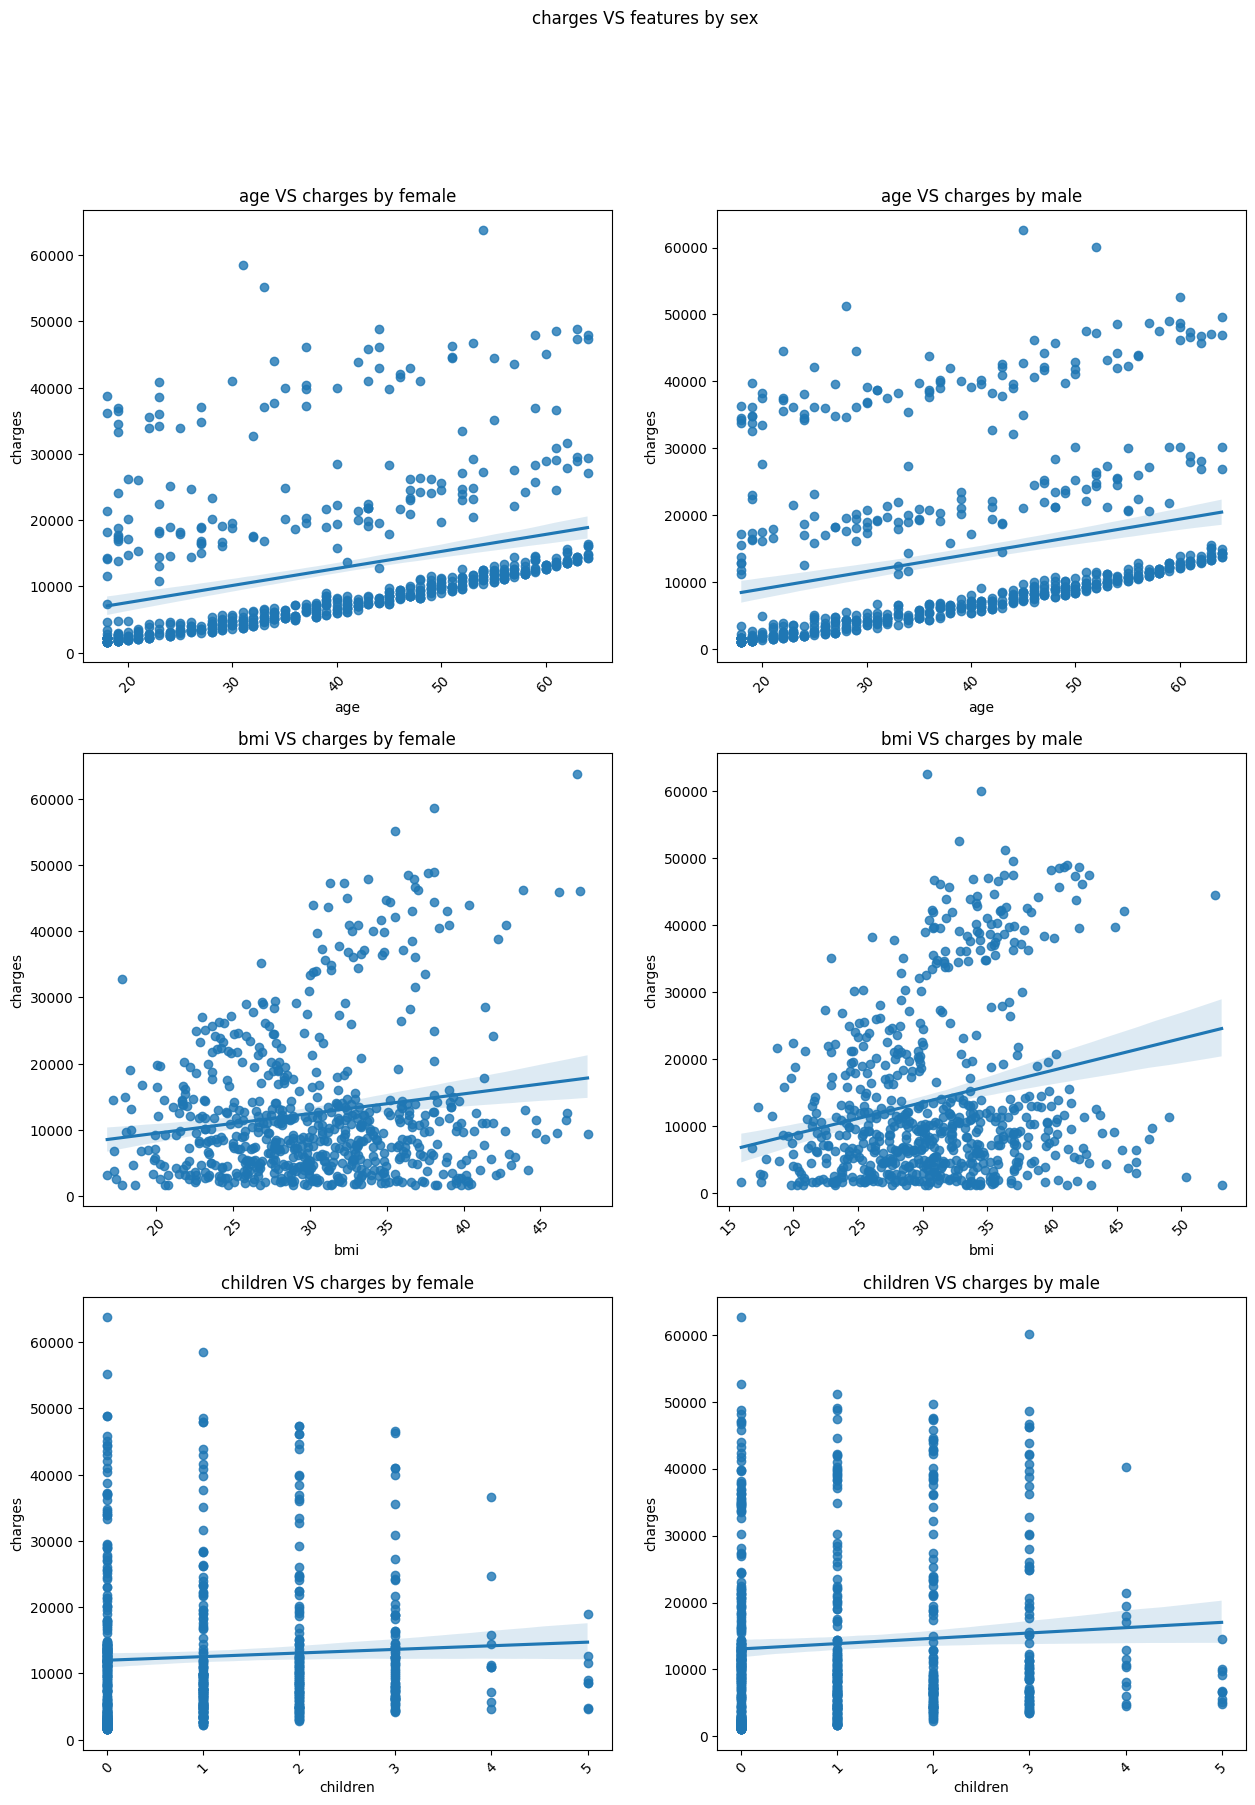

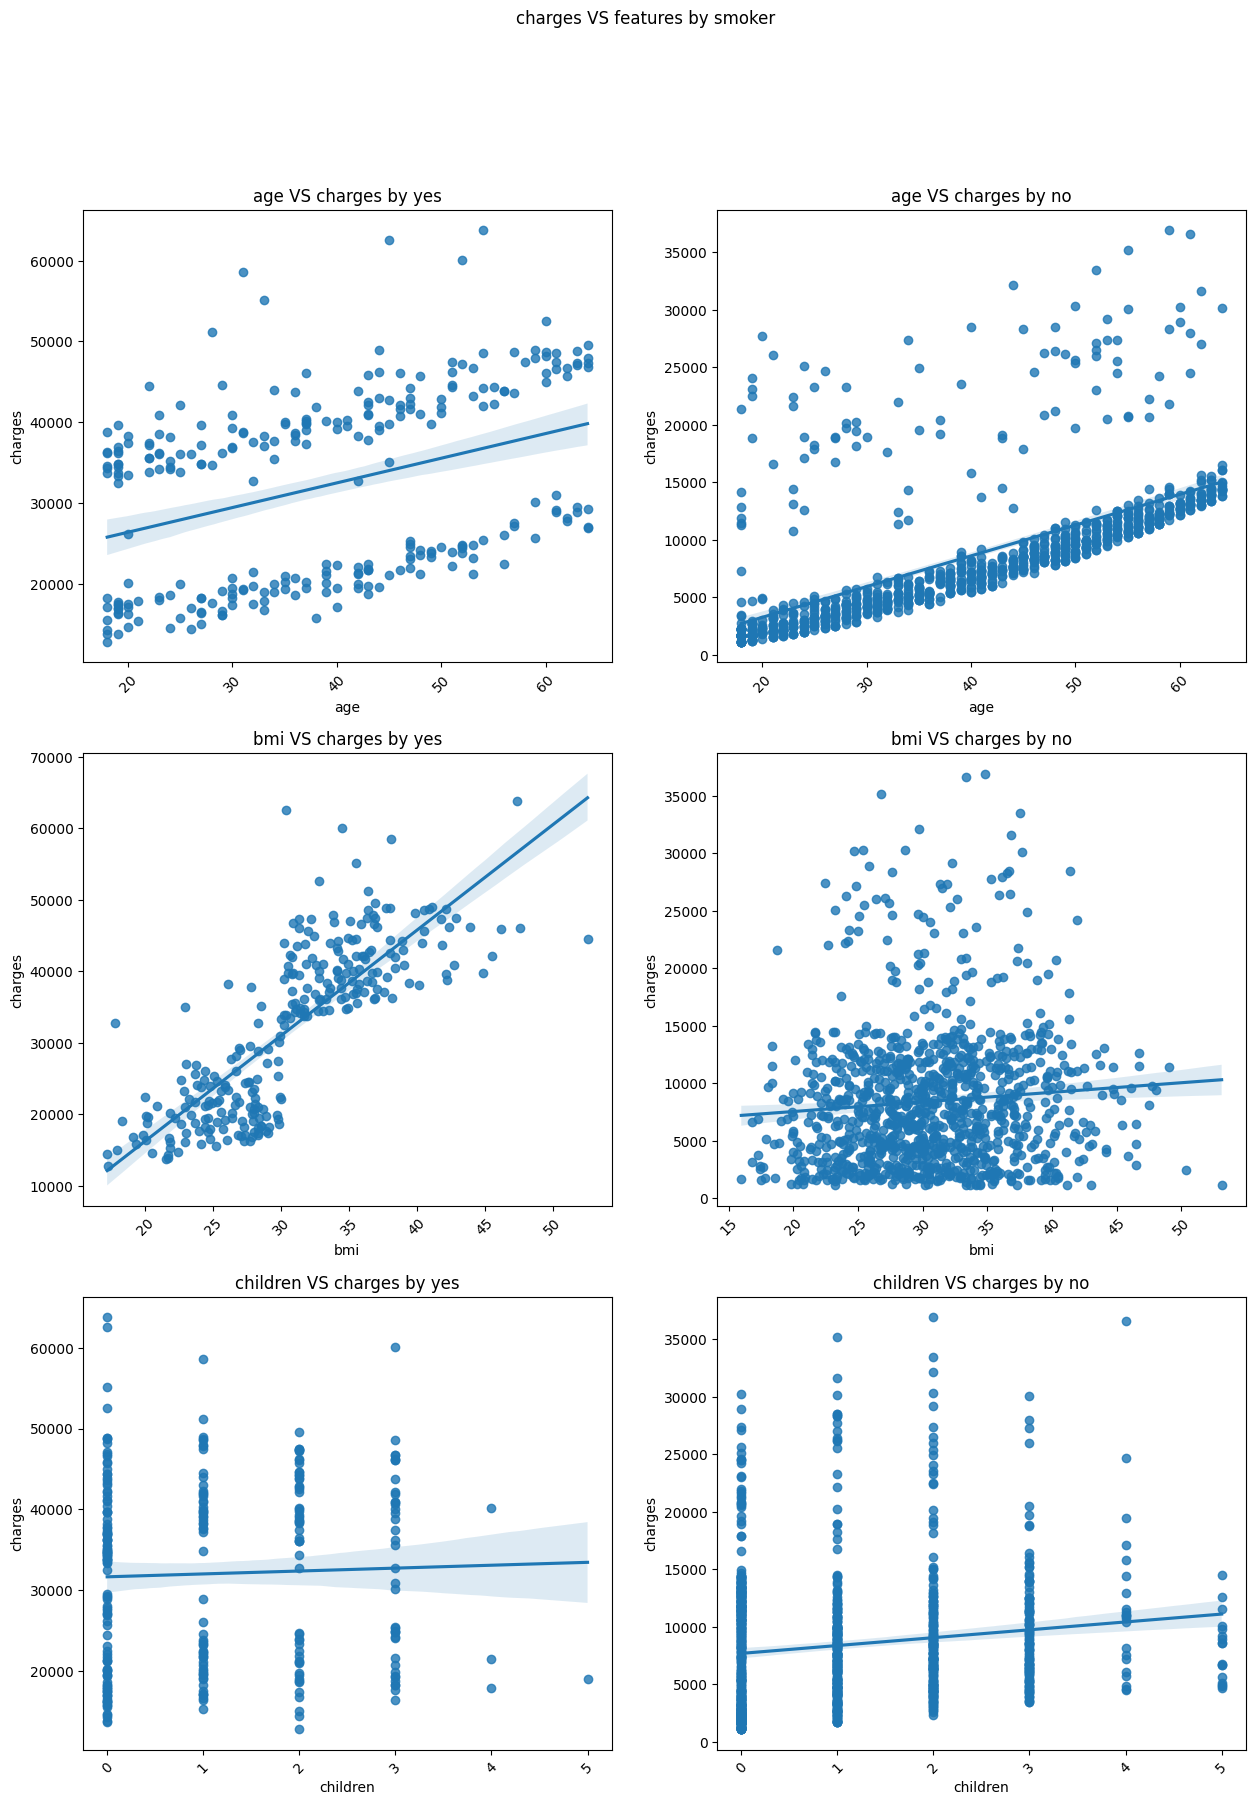

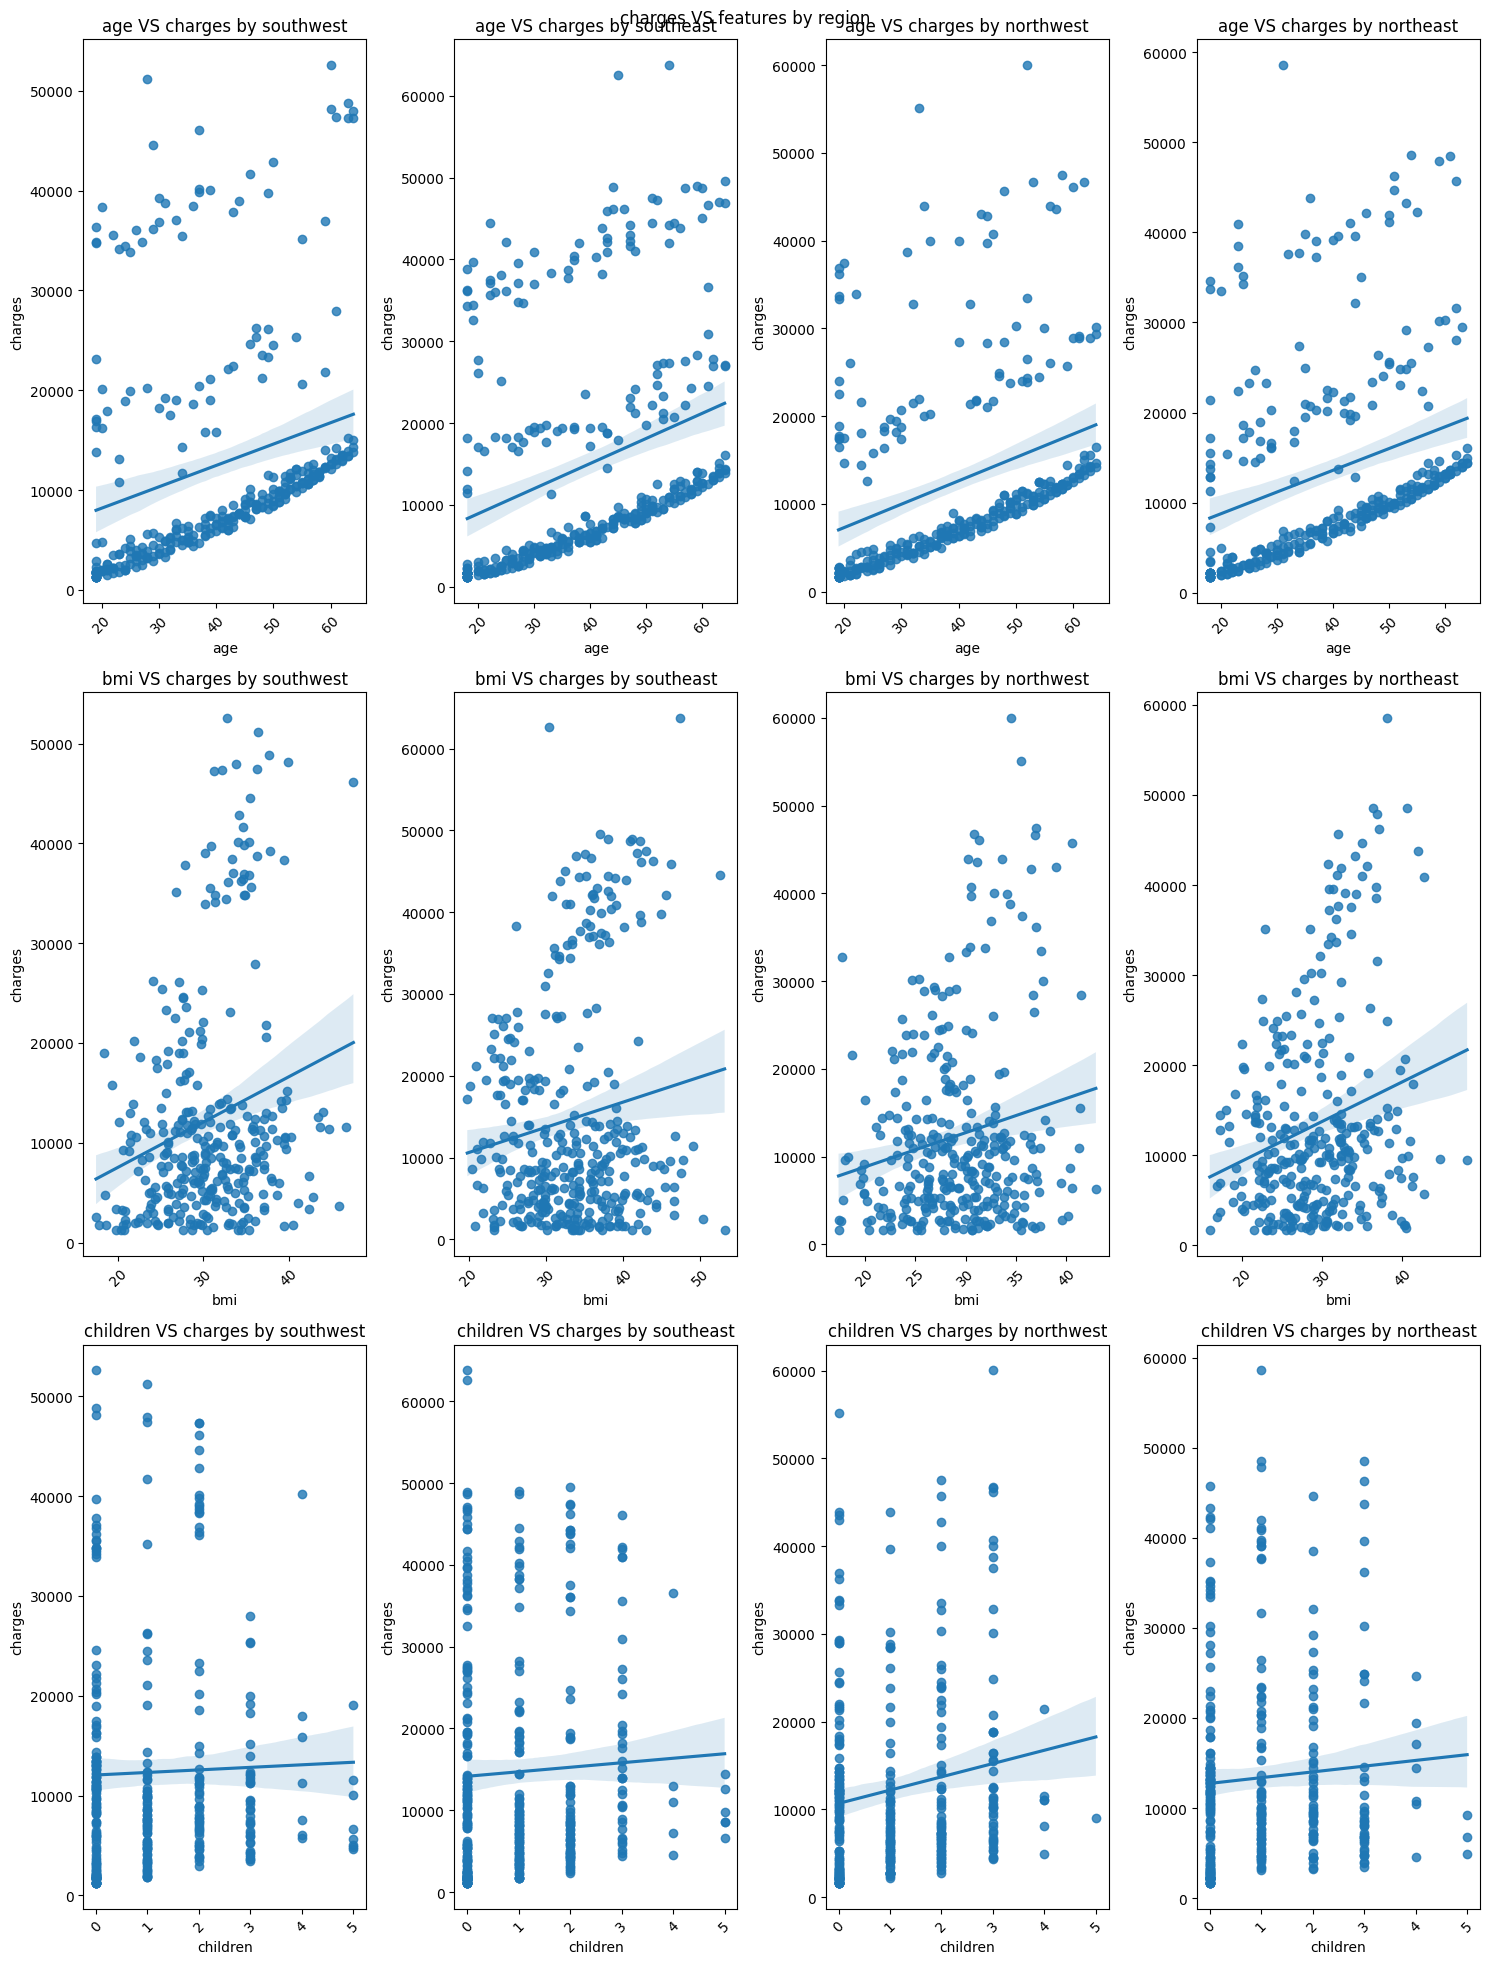

In [83]:
n = len(non_target_num_features)
for cat_feature in cat_features:
    m = data[cat_feature].nunique()
    fig, axes = plt.subplots(n, m, figsize=(15, 20))
    fig.suptitle('charges VS features by {}'.format(cat_feature))
    for i, num_feature in enumerate(non_target_num_features):
        for j, cat in enumerate(data[cat_feature].unique()):
            regplot = sns.regplot(data[data[cat_feature]==cat], x=num_feature, y='charges', ax=axes[i][j])
            regplot.set_title('{} VS charges by {}'.format(num_feature, cat))
            regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout()

In [84]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data, dtype=int)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [85]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

Задание 6.1

Прежде чем переходить к этапу моделирования, нам необходимо позаботиться о создании выборки для тестирования модели.

Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20. Воспользуйтесь функцией train_test_split.

В качестве значения параметра random_state укажите число 42.

Чему равно количество наблюдений в тестовом наборе данных?

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)
X_test.shape[0]

268

Задание 6.2

Обучите модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных. Все параметры оставьте по умолчанию.

Чему равен свободный член (intercept) обученной модели? Ответ округлите до сотых.

In [91]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
 
round(lr.intercept_, 2)

-12390.8

Задание 6.3

С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке. Рассчитайте следующие три метрики: R^2, MAE, MAPE. Не забудьте привести значение MAPE к процентам.

Значение R^2 округлите до трёх знаков после точки-разделителя, а значения MAE и MAPE — до целого числа.

Чему равны значения метрик на тренировочной и тестовой выборках?

In [97]:
y_predict_train = lr.predict(X_train)
y_predict_test = lr.predict(X_test)

print('train:')
print('MAE score: {:.0f} $'.format(metrics.mean_absolute_error(y_train, y_predict_train)))
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_train, y_predict_train) * 100))
print('R2 score: {:.3f}\n'.format(metrics.r2_score(y_train, y_predict_train)))

print('test')
print('MAE score: {:.0f} $'.format(metrics.mean_absolute_error(y_test, y_predict_test)))
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_predict_test) * 100))
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_predict_test)))

train:
MAE score: 4208 $
MAPE score: 42 %
R2 score: 0.742

test
MAE score: 4181 $
MAPE score: 47 %
R2 score: 0.784


Задание 6.4

Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки возьмите разницу между истинным ответом и предсказанием:  (без модуля).

Выберите верные ответы:

Text(0, 0.5, 'sapmple')

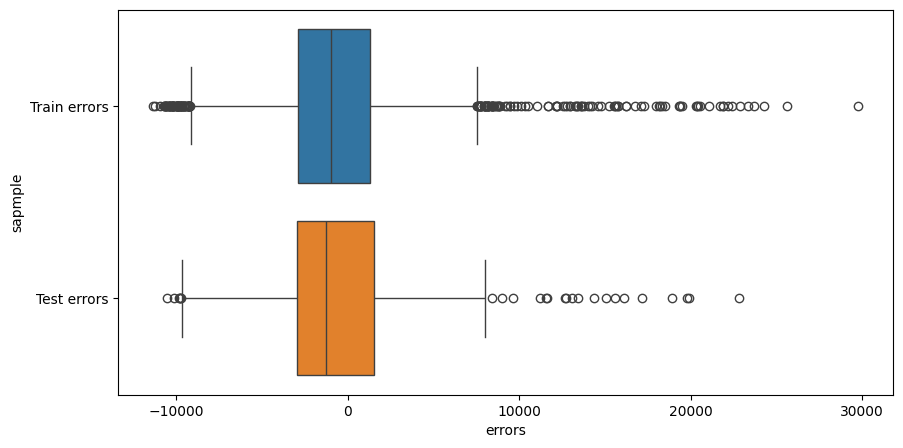

In [102]:
fig, ax = plt.subplots(figsize=(10, 5))

y_train_errors = y_train - y_predict_train
y_test_errors = y_test - y_predict_test

predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)

sns.boxplot(predict_df, orient='h', ax=ax)
ax.set_xlabel('errors')
ax.set_ylabel('sapmple')

Задание 6.5

Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler). Расчёт параметров нормализации (fit) произведите на тренировочной выборке.

Примечание. Min-max-нормализация не искажает изначальный вид бинарных категориальных признаков, в отличие от стандартизации.

На нормализованных данных сгенерируйте полиномиальные признаки степени 2. Воспользуйтесь классом PolynomialFeatures из библиотеки sklearn. Значение параметра include_bias выставите на False.

Чему равно результирующее количество столбцов?

In [103]:
mm_scaler = preprocessing.MinMaxScaler()
mm_scaler.fit(X_train)
X_train = mm_scaler.transform(X_train)
X_test = mm_scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_poly.shape[1]

54

Задание 6.6

Обучите модель линейной регрессии на полиномиальных признаках.

Чему равно значение метрики R^2 на тестовой выборке?

Значение R^2 округлите до трёх знаков после запятой.

In [104]:
lr_poly = linear_model.LinearRegression()

lr_poly.fit(X_train_poly, y_train)

y_train_predict_poly = lr_poly.predict(X_train_poly)
y_test_predict_poly = lr_poly.predict(X_test_poly)
 
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.842
Test R^2: 0.867


Задание 6.7

Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.

Какой вывод можно сделать?

In [110]:
lr_poly.coef_

array([-3.51760358e+16,  1.61021746e+15,  2.47615914e+15, -4.81004112e+15,
        1.29275952e+14, -3.52012791e+15, -2.48431178e+15, -2.59881721e+15,
       -1.45044066e+15,  8.44800000e+03,  8.02000000e+02,  9.72000000e+02,
       -1.67600000e+03,  1.70000000e+02,  3.51760358e+16,  3.51760358e+16,
        3.51760358e+16,  3.51760358e+16, -9.23535566e+14,  6.51750000e+02,
       -1.23750000e+03,  2.63000000e+02, -6.86681899e+14, -6.86681899e+14,
       -6.86681899e+14, -6.86681899e+14, -9.69775000e+03,  1.55693750e+03,
        5.48399844e+04, -2.47615914e+15, -2.47615914e+15, -2.47615914e+15,
       -2.47615914e+15, -2.09825000e+03, -2.23150000e+03,  4.81004112e+15,
        4.81004112e+15,  4.81004112e+15,  4.81004112e+15,  2.54047741e+13,
       -1.54680726e+14, -1.54680726e+14, -1.54680726e+14, -1.54680726e+14,
       -1.14203819e+15,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.17785432e+15,  0.00000000e+00,  0.00000000e+00, -2.06334889e+15,
        0.00000000e+00, -

Задание 6.8

Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000.

Чему равны метрики R^2, MAE и MAPE на тестовой выборке?

Значение R^2 округлите до трёх знаков после запятой, а значения MAE и MAPE до целого числа.

In [113]:
lasso_lr_poly = linear_model.Lasso(max_iter=2000)

lasso_lr_poly.fit(X_train_poly, y_train)

y_test_predict_poly_lasso = lasso_lr_poly.predict(X_test_poly)

print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly_lasso)))
print('MAE score: {:.0f} $'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly_lasso)))
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly_lasso) * 100))

R2 score: 0.867
MAE score: 2719 $
MAPE score: 30 %


Посмотрите на степени параметров модели после регуляризации. Сделайте вывод для себя.

In [112]:
lasso_lr_poly.coef_

array([ 3.24221653e+03, -4.92313816e+02,  5.07612317e+03,  4.58362056e+03,
        1.97928569e+03,  1.88025707e+02, -4.70775218e+02,  5.83657101e+02,
       -2.43543456e+02,  8.29826751e+03,  7.74581954e+02,  8.44448593e+02,
       -1.20775688e+03,  1.34809915e+02, -1.04309726e+03, -0.00000000e+00,
        1.16964229e+03,  1.61765564e+03, -0.00000000e+00,  5.05847740e+02,
       -1.13425152e+03,  2.65796922e+02, -1.22240479e+03,  0.00000000e+00,
        2.36213242e+02, -5.80031340e+02, -8.17963257e+03,  1.29487768e+03,
        5.47148553e+04,  3.58531873e+03,  2.40690210e+03, -9.63549427e+02,
        0.00000000e+00, -1.67464337e+03, -2.05436459e+03,  1.94204864e+03,
        1.95394442e+03, -0.00000000e+00, -1.06364416e+03,  8.00606774e+00,
        5.93688978e+02, -0.00000000e+00, -2.30643423e+02,  1.97933477e+03,
        6.31615519e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

Задание 6.9

Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000.

Чему равны метрики R^2, MAE и MAPE на тестовой выборке?

Значение R^2 округлите до трёх знаков после запятой, а значения MAE и MAPE до целого числа.

In [115]:
ridge_lr_poly = linear_model.Ridge(max_iter=2000)

ridge_lr_poly.fit(X_train_poly, y_train)

y_test_predict_poly_ridge = ridge_lr_poly.predict(X_test_poly)

print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly_ridge)))
print('MAE score: {:.0f} $'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly_ridge)))
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly_ridge) * 100))

R2 score: 0.863
MAE score: 2861 $
MAPE score: 31 %
